In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
print('tensorflow ver.', tf.__version__)

tensorflow ver. 2.1.0


MNISTの訓練データとテストデータのダウンロード

|　|  |
|--|--|
|画像サイズ|28x28|
|データ範囲|0-255 (uint8)
|データ数|訓練データ 6000枚
|　　　　|テストデータ 6000枚

In [3]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [4]:
print('クラス      ：', type(x_train))
print('データサイズ：', x_train.shape)
print('データ型　　：', x_train.dtype)
print('データ範囲　：', x_train.min(), '-', x_train.max())
print('ラベル範囲　：', y_train.min(), '-', y_train.max())
u, count = np.unique(y_train, return_counts=True)
print('データラベル：', u)
print('ラベル頻度　：', count)

クラス      ： <class 'numpy.ndarray'>
データサイズ： (60000, 28, 28)
データ型　　： uint8
データ範囲　： 0 - 255
ラベル範囲　： 0 - 9
データラベル： [0 1 2 3 4 5 6 7 8 9]
ラベル頻度　： [5923 6742 5958 6131 5842 5421 5918 6265 5851 5949]


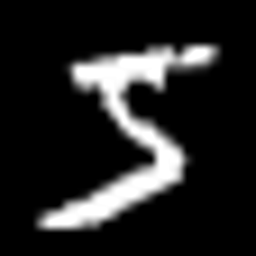

In [5]:
Image.fromarray(x_train[0]).resize((256,256))

データを0-1で正規化する

In [6]:
x_train, x_test = x_train / 255.0, x_test / 255.0

# モデルの構築

- Flatten : 一次元配列に変換
- Dense：全結合層、活性化関数を指定
- Dropout: dropout率を指定。訓練の間に要素の20%のニューロンがランダムにドロップアウトされることを表す。

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
], name='tf_tutorial_model')

model.summary()

Model: "tf_tutorial_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


NNの学習の目的は、損失関数の値を最小化するパラメータを見つけるいわば最適化の一種です。なので、最適パラメータを探索するためのアルゴリズムや損失関数、評価関数を指定してあげる必要があります。

- `optimizer` : 最適化アルゴリズムの指定
- `loss` :  損失関数の指定（一般的に、二乗和誤差や交差エントロピー誤差など）

| | |
|:--|:--|
|2乗和誤差|$ E = \frac{1}{2}\sum_{k} (y_k-t_k)^2$|
|交差エントロピー誤差|$ E=-\sum_{k}t_k logy_k $

- `metrics` : 評価関数の指定。"accuracy"を選択すると、損失関数や出力テンソルの情報から自動で"categorical_accuracy"などを判断してくれる。[3]

In [8]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# モデルの訓練および評価

- `mode.fit`：モデルの訓練
- `model.evaluate`：モデルの評価

In [9]:
fit = model.fit(x_train, y_train, epochs=5)

model.evaluate(x_test,  y_test, verbose=2)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 2s 36us/sample - loss: 0.2944 - accuracy: 0.9148
Epoch 2/5
60000/60000 [==============================] - 2s 33us/sample - loss: 0.1412 - accuracy: 0.9583
Epoch 3/5
60000/60000 [==============================] - 2s 33us/sample - loss: 0.1066 - accuracy: 0.9679
Epoch 4/5
60000/60000 [==============================] - 2s 34us/sample - loss: 0.0871 - accuracy: 0.9731
Epoch 5/5
60000/60000 [==============================] - 2s 33us/sample - loss: 0.0740 - accuracy: 0.9768
10000/10000 - 0s - loss: 0.0725 - accuracy: 0.9782


[0.07253923879633657, 0.9782]

KeyError: 'acc'

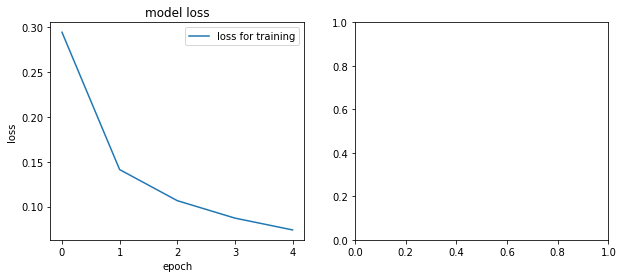

In [10]:
fig, (axL, axR) = plt.subplots(ncols=2, figsize=(10,4))

axL.plot(fit.history['loss'],label="loss for training")
axL.set_title('model loss')
axL.set_xlabel('epoch')
axL.set_ylabel('loss')
axL.legend(loc='upper right')

axR.plot(fit.history['acc'],label="loss for training")
axR.set_title('model accuracy')
axR.set_xlabel('epoch')
axR.set_ylabel('accuracy')
axR.legend(loc='upper right')

# 参考サイト

1. [初心者のための TensorFlow 2.0 入門  |  TensorFlow Core](https://www.tensorflow.org/tutorials/quickstart/beginner?hl=ja)
1. [TensorFlow, Kerasの基本的な使い方（モデル構築・訓練・評価・予測） | note.nkmk.me](https://note.nkmk.me/python-tensorflow-keras-basics/)
1. [【Keras入門(4)】Kerasの評価関数(Metrics) - Qiita](https://qiita.com/FukuharaYohei/items/f7df70b984a4c7a53d58)
1. [MNISTでハイパーパラメータをいじってloss/accuracyグラフを見てみる - Qiita](https://qiita.com/hiroyuki827/items/213146d551a6e2227810)